In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("NFLX.csv")

In [7]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [8]:
viz = df.copy()

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.shape

(1009, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [13]:
train, test = train_test_split(df, test_size = 0.2)

In [14]:
test_pred = test.copy()

In [16]:
train.head(13)

,Date,Open,High,Low,Close,Adj Close,Volume
873,2021-07-26,514.380005,521.130005,509.010010,516.489990,516.489990,2254500
518,2020-02-27,371.459991,391.559998,370.600006,371.709991,371.709991,10967700
638,2020-08-18,484.350006,495.299988,482.799988,491.869995,491.869995,3505500
287,2019-03-28,354.489990,355.940002,349.200012,354.609985,354.609985,4361000
350,2019-06-27,363.200012,370.850006,363.200012,370.019989,370.019989,4138600
273,2019-03-08,345.750000,349.920013,342.470001,349.600006,349.600006,6898800
911,2021-09-17,587.849976,590.280029,580.849976,589.349976,589.349976,4145100
252,2019-02-06,357.000000,357.040009,347.190002,352.190002,352.190002,6717700
613,2020-07-14,517.080017,525.500000,490.489990,524.880005,524.880005,15083300
852,2021-06-24,517.960022,520.960022,514.400024,518.059998,518.059998,3361200


In [17]:
test.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
413,2019-09-26,266.420013,268.049988,260.200012,263.309998,263.309998,7684000
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
119,2018-07-26,358.190002,365.540009,356.630005,363.089996,363.089996,6993700
304,2019-04-23,375.450012,384.799988,374.709991,381.890015,381.890015,10089800
118,2018-07-25,357.570007,363.279999,355.649994,362.869995,362.869995,8467800
254,2019-02-08,338.000000,348.000000,338.000000,347.570007,347.570007,7561400
95,2018-06-21,421.380005,423.209991,406.369995,415.440002,415.440002,18389900
635,2020-08-13,478.399994,484.450012,476.450012,481.329987,481.329987,3008900
79,2018-05-30,352.369995,354.000000,349.260010,353.540009,353.540009,5685500
902,2021-09-03,585.799988,591.880005,583.140015,590.530029,590.530029,2681200


In [18]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [19]:
y_train = train['Close'].values
y_test = test['Close'].values

In [20]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = model_lnr.predict(x_test)

In [22]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.52057612]


In [23]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 18.837
RMSE 4.34
MAE 3.031
MAPE 0.008
R2 Score :  0.998


In [24]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [25]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [26]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


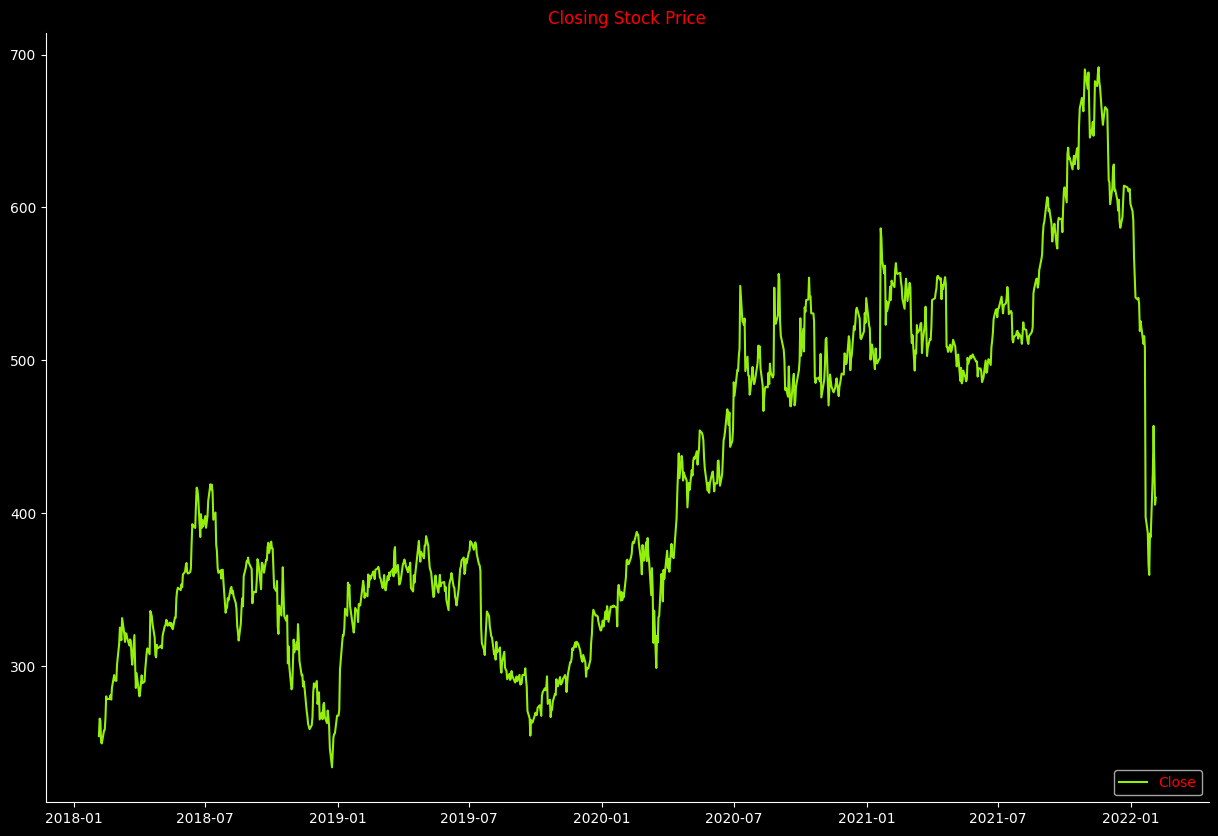

In [32]:
style()

plt.title('Closing Stock Price', color="red")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="center", facecolor='black', labelcolor='red')

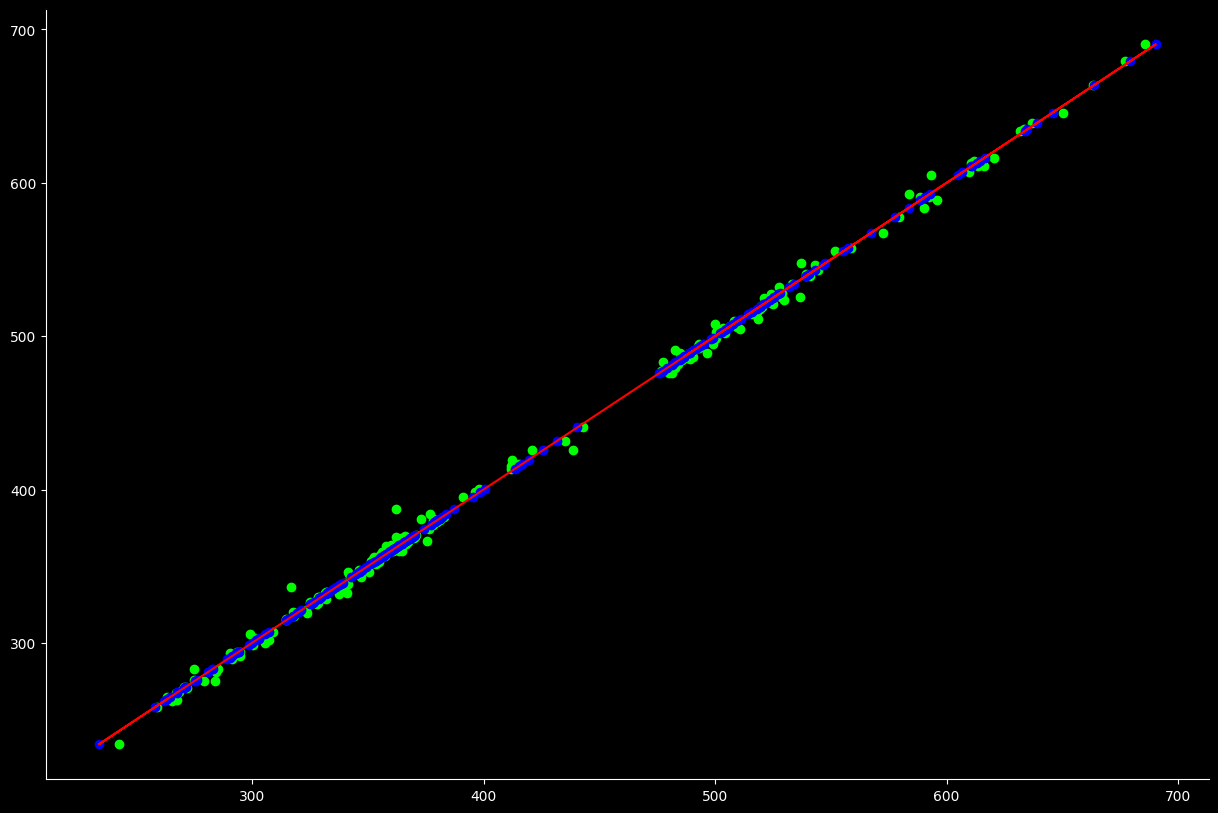

In [42]:
style()

plt.scatter(y_pred, y_test, color='lime', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='red')

In [43]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
413,2019-09-26,266.420013,268.049988,260.200012,263.309998,263.309998,7684000,263.081128
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,258.766692
119,2018-07-26,358.190002,365.540009,356.630005,363.089996,363.089996,6993700,363.084167
304,2019-04-23,375.450012,384.799988,374.709991,381.890015,381.890015,10089800,382.795027
118,2018-07-25,357.570007,363.279999,355.649994,362.869995,362.869995,8467800,361.023129
...,...,...,...,...,...,...,...,...
346,2019-06-21,365.000000,371.450012,365.000000,369.209991,369.209991,7448400,370.525943
704,2020-11-19,482.000000,487.799988,480.470001,484.670013,484.670013,2254700,485.487404
314,2019-05-07,377.000000,379.910004,365.809998,370.459991,370.459991,6974900,370.605891
516,2020-02-25,372.000000,375.649994,357.720001,360.089996,360.089996,6481200,363.594373


In [44]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,417.050049,106.867410,233.880005,335.294990,372.294998,504.457505,690.309998
Close_Prediction,202.0,417.095556,106.858493,242.428211,338.301289,371.762591,502.915771,685.864443


In [45]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'],format='%Y-%m-%d')

In [46]:
output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-13,258.269989,258.766692
2018-02-14,NaN,NaN
2018-02-15,NaN,NaN
2018-02-16,NaN,NaN
2018-02-17,NaN,NaN
...,...,...
2022-01-22,NaN,NaN
2022-01-23,NaN,NaN
2022-01-24,387.149994,362.305276


In [47]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV successfully saved!")

CSV successfully saved!
